In [33]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
import seaborn as sns
import pylab as py 
warnings.filterwarnings('ignore')
%matplotlib inline


In [34]:
df=pd.read_csv('supermarket_sales (1).csv')
print(df)


      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

Exploring The Dataset using different methods of pandas 

 by using head function we can see first n rows of dataset:

In [35]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


by using tail method we can see last n rows of dataset default(n=5):

In [36]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


shape method gives information about shape of the dataset :

In [37]:
df.shape

(1000, 17)

columns method gives name of the columns present in dataset:

In [38]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

info() method gives full detailed information about dataset:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

describe() method gives statistical measures of numerical features of dataset:

In [40]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [41]:
df.describe(include="O")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,478-06-7835,A,Yangon,Member,Female,Fashion accessories,2/7/2019,14:42,Ewallet
freq,1,340,340,501,501,178,20,7,345


duplicated() method is used to find duplicate rows in dataset:

In [42]:
df[df.duplicated()]                        # there is no duplicate row in dataset:

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [43]:
# to check null values in any column:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [44]:
# to count and name the numerical feature we have in our dataset:
numerical_feature=[i for i in df.columns if df[i].dtype!='O']
print(" we have {} numerical features: {}".format(len(numerical_feature),numerical_feature))

 we have 8 numerical features: ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [45]:
# to count and name all the categorical feature we have in our dataset:
categorical_feature=[j for j in df.columns if df[j].dtype=='O']
print("we have {} categorical features: {}".format(len(categorical_feature),categorical_feature))

we have 9 categorical features: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


<AxesSubplot:xlabel='Rating', ylabel='Density'>

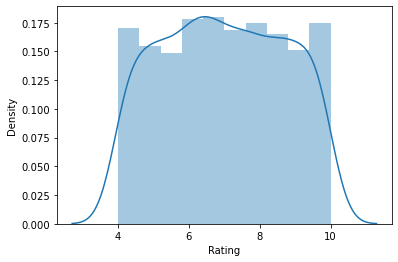

In [46]:
sns.distplot(df["Rating"])

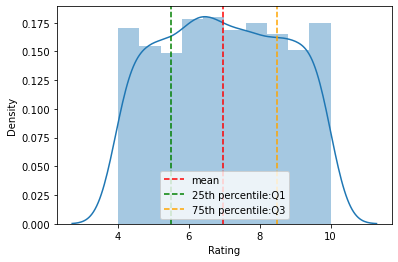

In [47]:
# What does the customer rating look like and  distribution and is it skewed?
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3')
plt.legend()
plt.show()

A    340
B    332
C    328
Name: Branch, dtype: int64


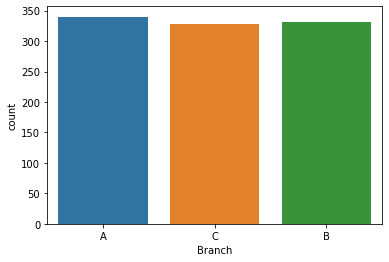

In [48]:
# Is there any difference in aggregate sales across branches?
sns.countplot(df['Branch'],data=df)
print(df['Branch'].value_counts())
plt.show()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


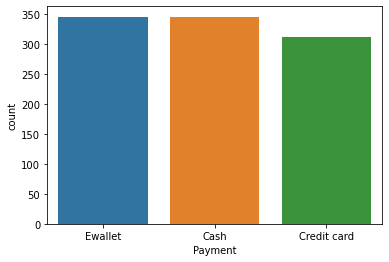

In [49]:
# Which is the most pouplar payment method used by customers?
sns.countplot(df['Payment'])
print(df['Payment'].value_counts())
plt.show()

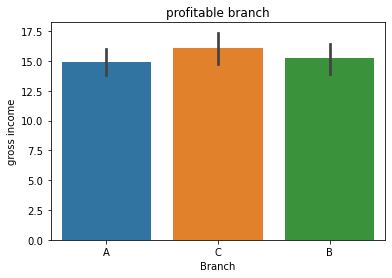

In [50]:
# Which branch is the most profitable?
sns.barplot(x=df['Branch'], y=df['gross income'])
plt.title("profitable branch")
plt.show()

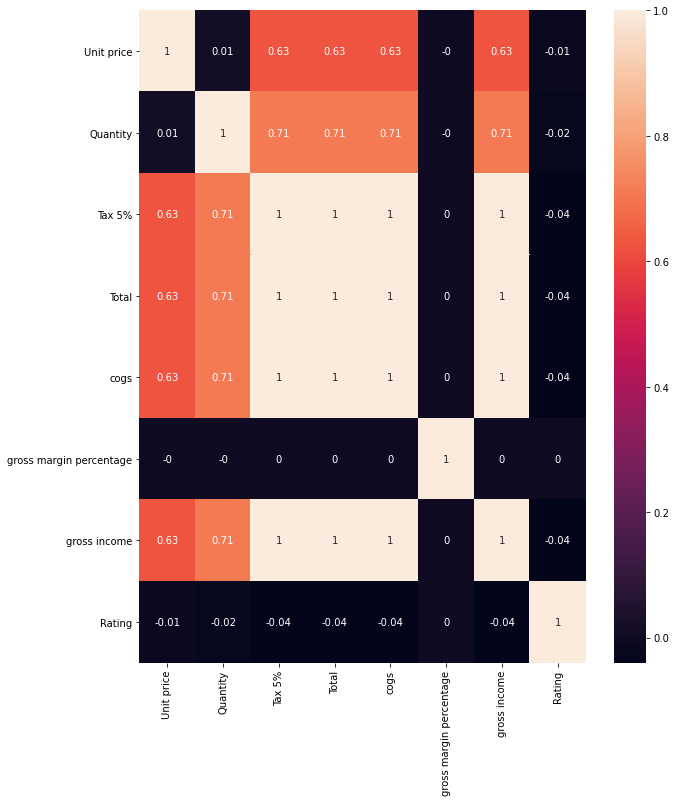

In [51]:
# The seaborn heat-map can be used to visualize the correlations among variables.
plt.figure(figsize=(10,12))
sns.heatmap(np.round(df.corr(),2), annot=True)
plt.show()

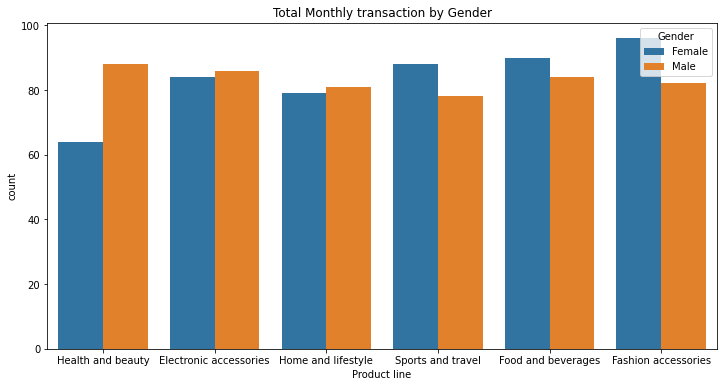

In [52]:
# What is the spending pattern of females and males and in which category do they spend a lot?
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(x='Product line', hue = "Gender",data=df)
plt.show()

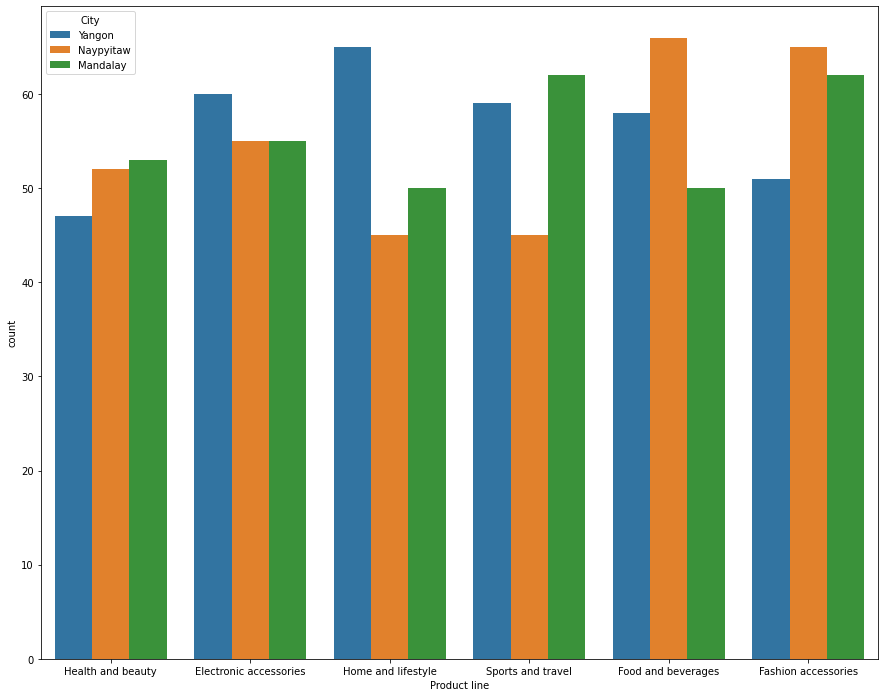

In [53]:
plt.figure(figsize = (15,12))
sns.countplot(df["Product line"], hue = df.City,  data = df)
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_feature:
    df[i]=le.fit_transform(df[i])

In [55]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3


plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True, fmt = '.0%')

data preprocessing for model building

In [56]:
df = df.drop(['Date', 'Time', 'Invoice ID'], axis = 1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3


In [57]:
df = df.drop('gross margin percentage', axis = 1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,30.2085,5.3


In [58]:
y=df['gross income']
x=df.drop('gross income',axis=1)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [60]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [63]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 687 to 684
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         800 non-null    int32  
 1   City           800 non-null    int32  
 2   Customer type  800 non-null    int32  
 3   Gender         800 non-null    int32  
 4   Product line   800 non-null    int32  
 5   Unit price     800 non-null    float64
 6   Quantity       800 non-null    int64  
 7   Tax 5%         800 non-null    float64
 8   Total          800 non-null    float64
 9   Payment        800 non-null    int32  
 10  cogs           800 non-null    float64
 11  Rating         800 non-null    float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 62.5 KB


In [65]:
x_train.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating
687,0,2,0,1,4,63.56,10,31.7800,667.3800,0,635.60,4.3
500,1,0,0,1,5,73.97,1,3.6985,77.6685,1,73.97,5.4
332,0,2,1,1,1,77.02,5,19.2550,404.3550,0,385.10,5.5
979,1,0,1,0,2,67.77,1,3.3885,71.1585,1,67.77,6.5
817,0,2,1,1,2,33.88,8,13.5520,284.5920,2,271.04,9.6


In [66]:
y_pred = reg.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Training Score:\n",reg.score(x_train,y_train)*100)

Training Score:
 100.0


In [68]:
print("Testing Score:\n",reg.score(x_test,y_test)*100)

Testing Score:
 100.0


In [69]:
y_pred

array([ 8.745 , 21.4335, 12.002 ,  6.663 , 11.0115, 12.9185,  8.767 ,
        1.5885, 14.0805,  8.6   ,  6.322 , 12.498 ,  2.54  ,  4.4845,
       12.854 , 34.392 , 42.305 , 15.228 , 35.69  ,  9.0045, 35.1315,
       16.4   , 23.979 ,  6.933 , 10.326 ,  9.0705, 18.792 , 17.478 ,
       38.6   ,  3.82  , 10.3065, 24.186 , 33.725 ,  2.3205, 11.306 ,
       28.42  , 13.806 , 23.094 , 10.3455, 37.3   ,  8.137 , 48.69  ,
       33.235 , 31.311 , 17.595 , 17.604 , 11.79  , 45.25  ,  3.162 ,
       10.765 ,  4.935 , 12.98  ,  7.66  ,  7.038 ,  5.076 ,  9.298 ,
        9.693 , 16.8575, 24.8   ,  8.814 , 25.893 , 29.008 , 34.3   ,
       21.4935,  3.876 ,  4.37  ,  2.7225, 34.672 ,  1.439 , 12.06  ,
       36.624 ,  4.4305, 19.4635,  4.485 ,  4.4155,  5.2425,  6.377 ,
        3.0435,  3.2495, 12.036 ,  3.29  , 34.83  , 14.031 , 43.866 ,
       24.505 , 25.683 ,  4.3525,  1.595 , 27.072 ,  4.658 , 15.9025,
        9.989 , 29.099 , 22.01  ,  4.4075,  9.898 , 27.951 , 15.291 ,
       13.188 ,  3.0

In [70]:
y_test

993     8.7450
859    21.4335
298    12.0020
553     6.6630
672    11.0115
        ...   
679    14.5500
722     6.6180
215     0.9140
653    16.7940
150    18.3080
Name: gross income, Length: 200, dtype: float64

In [72]:
from sklearn.linear_model import ElasticNet
ela = ElasticNet()
ela.fit(x_train, y_train)


ElasticNet()

In [73]:
print("Training Score:\n",ela.score(x_train,y_train)*100)

Training Score:
 99.99999664656724


In [74]:
print("Testing Score:\n",ela.score(x_test,y_test)*100)

Testing Score:
 99.99999664578213


In [75]:
from sklearn.linear_model import BayesianRidge
bsr = BayesianRidge()
bsr.fit(x_train, y_train)


BayesianRidge()

In [76]:
print("Training Score:\n",bsr.score(x_train,y_train)*100)

Training Score:
 99.99999999993287


In [77]:
print("Testing Score:\n",bsr.score(x_test,y_test)*100)

Testing Score:
 99.99999999993285


In [78]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)


SVR()

In [79]:
print("Training Score:\n",svr.score(x_train,y_train)*100)

Training Score:
 99.67933081155218


In [80]:
print("Testing Score:\n",svr.score(x_test,y_test)*100)


Testing Score:
 99.78436640244199


In [81]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge()
kr.fit(x_train, y_train)

KernelRidge()

In [82]:
print("Training Score:\n",kr.score(x_train,y_train)*100)

Training Score:
 99.99999999999993


In [83]:
print("Testing Score:\n",kr.score(x_test,y_test)*100)

Testing Score:
 99.99999999999993


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [85]:
print("Training Score:\n",gbr.score(x_train,y_train)*100)

Training Score:
 99.99651810214009


In [86]:
print("Testing Score:\n",gbr.score(x_test,y_test)*100)

Testing Score:
 99.9944509608885
